## Pruebas del modulo de acceso a los datos de contador

In [1]:
import pandas as pd
from kwhmeter import suministro,contador, timezone, append_prices, read_config
from datetime import datetime, timedelta
import seaborn as sns


In [2]:
credenciales=read_config()
connection = contador(**credenciales['alarcon'])
#connection = contador(iberdrola,user,password)  #equivalente
#connection = suministro('alarcon')  #equivalente

Existen 9 facturas. Desde: 2022-06-15 00:00:00+02:00 hasta:2023-01-24 00:00:00+01:00


In [3]:

to_day = timezone.localize(datetime(2023,1,19)-timedelta(days=0))
from_day=to_day-timedelta(days=3)

print(f'Recuperando datos desde: {from_day} hasta:{to_day}')


Recuperando datos desde: 2023-01-16 00:00:00+01:00 hasta:2023-01-19 00:00:00+01:00


In [4]:
facturas=connection.facturas()
facturas

,fechaInicio,fechaFin
factura,,
2023-01-25,2023-01-05 00:00:00+01:00,2023-01-24 00:00:00+01:00
2023-01-04,2022-12-25 00:00:00+01:00,2023-01-03 00:00:00+01:00
2022-12-25,2022-11-25 00:00:00+01:00,2022-12-24 00:00:00+01:00
2022-11-25,2022-10-25 00:00:00+02:00,2022-11-24 00:00:00+01:00
2022-10-25,2022-09-25 00:00:00+02:00,2022-10-24 00:00:00+02:00
2022-09-25,2022-08-25 00:00:00+02:00,2022-09-24 00:00:00+02:00
2022-08-25,2022-07-25 00:00:00+02:00,2022-08-24 00:00:00+02:00
2022-07-25,2022-06-25 00:00:00+02:00,2022-07-24 00:00:00+02:00
2022-06-25,2022-06-15 00:00:00+02:00,2022-06-24 00:00:00+02:00


In [7]:
#cc=connection.consumo(from_day,to_day)
cc=connection.consumo_facturado(['2023-01-25'])
cc=append_prices(cc)


INFO:root:recovering missing dates:0


In [8]:
cc

,consumo,tipo,periodo,factura,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB
fecha,,,,,,,,,,
2023-01-05 01:00:00+01:00,54.0,R,P3,2023-01-25,147.83,7.24,3.18,0.007983,0.000391,0.000172
2023-01-05 02:00:00+01:00,35.0,R,P3,2023-01-25,134.53,6.89,3.18,0.004709,0.000241,0.000111
2023-01-05 03:00:00+01:00,34.0,R,P3,2023-01-25,125.31,8.05,3.18,0.004261,0.000274,0.000108
2023-01-05 04:00:00+01:00,31.0,R,P3,2023-01-25,120.36,6.73,3.18,0.003731,0.000209,0.000099
2023-01-05 05:00:00+01:00,28.0,R,P3,2023-01-25,118.39,7.33,3.18,0.003315,0.000205,0.000089
...,...,...,...,...,...,...,...,...,...,...
2023-01-23 20:00:00+01:00,516.0,R,P1,2023-01-25,276.14,1.72,72.99,0.142488,0.000888,0.037663
2023-01-23 21:00:00+01:00,321.0,R,P1,2023-01-25,277.91,1.93,72.99,0.089209,0.000620,0.023430
2023-01-23 22:00:00+01:00,95.0,R,P1,2023-01-25,268.87,1.27,72.99,0.025543,0.000121,0.006934


<AxesSubplot:xlabel='fecha'>

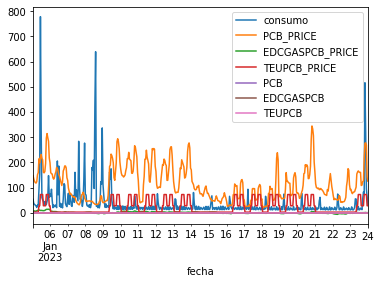

In [9]:
cc.plot()

In [10]:
cc.to_csv('consumos.csv',decimal=',')


In [11]:
totales=cc.groupby(['factura'])[['consumo','PCB','EDCGASPCB','TEUPCB']].sum()
totales

,consumo,PCB,EDCGASPCB,TEUPCB
factura,,,,
2023-01-25,17530.0,2.163359,0.042347,0.417798


In [12]:
cc['2022-08-25':'2022-09-30']['consumo'].sum()+cc['2022-10-01':'2022-10-24']['consumo'].sum()

0.0

In [13]:
cc.groupby(['factura','tipo']).sum()

<ipython-input-13-4a6b15d68e66>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby(['factura','tipo']).sum()


,,consumo,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB
factura,tipo,,,,,,,
2023-01-25,R,17530.0,53212.64,841.5,10589.28,2.163359,0.042347,0.417798


In [14]:
cc.groupby(['factura','periodo']).sum()

<ipython-input-14-3d54d8d27882>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby(['factura','periodo']).sum()


consumo  PCB_PRICE  EDCGASPCB_PRICE  TEUPCB_PRICE  \
factura    periodo                                                      
2023-01-25 P1        4281.0   19184.41           296.53       7007.04   
           P2        2489.0   12763.79           253.52       2742.72   
           P3       10760.0   21264.44           291.45        839.52   

                         PCB  EDCGASPCB    TEUPCB  
factura    periodo                                 
2023-01-25 P1       0.983830   0.022281  0.312470  
           P2       0.372629   0.009629  0.071111  
           P3       0.806899   0.010438  0.034217

In [15]:
cc.groupby(['factura','periodo','tipo']).sum()

consumo  PCB_PRICE  EDCGASPCB_PRICE  TEUPCB_PRICE  \
factura    periodo tipo                                                      
2023-01-25 P1      R      4281.0   19184.41           296.53       7007.04   
           P2      R      2489.0   12763.79           253.52       2742.72   
           P3      R     10760.0   21264.44           291.45        839.52   

                              PCB  EDCGASPCB    TEUPCB  
factura    periodo tipo                                 
2023-01-25 P1      R     0.983830   0.022281  0.312470  
           P2      R     0.372629   0.009629  0.071111  
           P3      R     0.806899   0.010438  0.034217

<ipython-input-16-f9d6a7d50a59>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=cc.groupby(['factura','periodo']).sum().reset_index(),x='factura',y='consumo',hue='periodo')


<AxesSubplot:xlabel='factura', ylabel='consumo'>

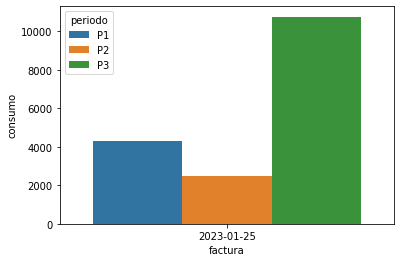

In [16]:
sns.barplot(data=cc.groupby(['factura','periodo']).sum().reset_index(),x='factura',y='consumo',hue='periodo')